In [261]:
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combine_city_ride = pd.merge(ride_data, city_data, on='city', how='left')




## Bubble Plot of Ride Sharing Data

In [262]:
#Remove duplicates 
city_df = combine_city_ride.drop_duplicates('city')

by_city = combine_city_ride.groupby('city')

# average fare by city
avg_fare = by_city['fare'].mean().round(2)

# rides by city
ride_count = by_city['ride_id'].count()

# num of drivers
driver_count = by_city['driver_count'].mean()

city_type = city_df.set_index('city')['type']

city_merge = pd.DataFrame({"Number of Rides": ride_count,
                           "Average Fare": avg_fare,
                           "Type of City": city_type,
                           "Number of Drivers": driver_count})



#Split the cyty type to be able to make the plot 
rural = city_merge[city_merge['Type of City'] == 'Rural']
suburban = city_merge[city_merge['Type of City'] == 'Suburban']
urban = city_merge[city_merge['Type of City'] == 'Urban']




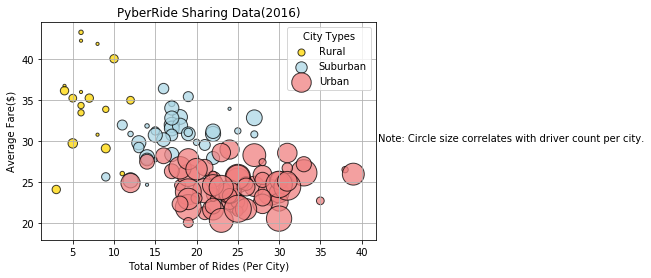

In [263]:
# Incorporate the other graph properties

plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, 
            facecolors="gold", edgecolor = 'black', label = 'Rural', alpha = .75, linewidths = 1)

plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, 
            facecolors="lightblue", edgecolor = 'black', label = 'Suburban', alpha = .75, linewidths = 1)

plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, 
           facecolors="lightcoral", edgecolor = 'black', label = 'Urban', alpha = .75, linewidths = 1)

plt.title("PyberRide Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.text(42,30, "Note: Circle size correlates with driver count per city.")
plt.legend(title = 'City Types')
plt.grid(True)
plt.show()


In [264]:
# Save Figure
#plt.savefig("Images/Pyber_Ride_Sharing_Data.png")

In [265]:
 #Total Fares by City Type

In [266]:
sum_fare_cities=combine_city_ride.groupby(by="type")["fare"].sum()
total_sum_fare = sum_fare_cities.sum()
percentage = (sum_fare_cities/total_sum_fare)

sum_fare_cities = pd.DataFrame([percentage * 100])
sum_fare_cities

type,Rural,Suburban,Urban
fare,6.811493,30.463872,62.724635


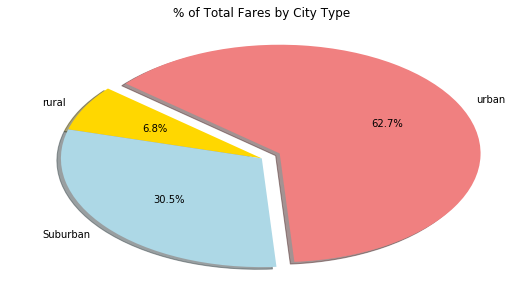

In [267]:
# Build Pie Chart
labels = ["rural","Suburban","urban"]
colors =["gold","lightblue","lightcoral"]
explode = (0, 0, .10)
plt.figure(figsize=(9,5))

plt.pie(percentage, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


plt.title("% of Total Fares by City Type")
plt.show()

In [275]:
# Save Figure
#plt.savefig("Images/Total_Fares_by_City_Type.png")

## Total Rides by City Type

In [269]:
rides = combine_city_ride.groupby("type")
sum_rides_cities = rides["ride_id"].count()

#Percent
sum_type_rides = sum_rides_cities.sum()
percent = sum_rides_cities/sum_type_rides

#DataFrame
summary_fare_cities = pd.DataFrame([percent * 100])
summary_fare_cities.head()


type,Rural,Suburban,Urban
ride_id,5.263158,26.315789,68.421053


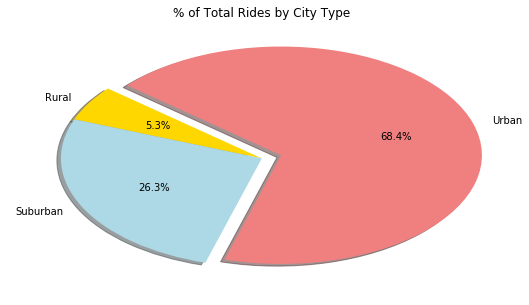

In [270]:
# Build Pie Char
labels = sum_rides_cities.index
colors =["gold","lightblue","lightcoral"]
explode = (0, 0, .10)
plt.figure(figsize=(9,5))

plt.pie(sum_rides_cities, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()

In [276]:
# Save Figure
#plt.savefig("Images/Total_Rides_by_City_Type.png")

## Total Drivers by City Type

In [272]:
drivers = city_df.groupby("type")
drivers_sum = drivers["driver_count"].sum()

sum_type_drivers = drivers_sum.sum()
percent = drivers_sum/sum_type_drivers 

summary_type_drivers = pd.DataFrame([percent * 100])
summary_type_drivers



type,Rural,Suburban,Urban
driver_count,2.623613,16.481668,80.894719


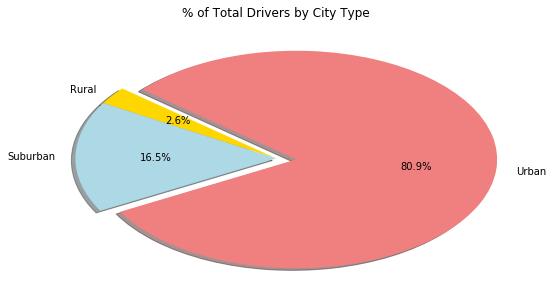

In [273]:
label = drivers_sum.index
colors =["gold","lightblue","lightcoral"]
explode = (0, 0, .10)
plt.figure(figsize=(9,5))

plt.pie(drivers_sum, explode=explode, labels=label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show()

In [277]:
# Save Figure
#plt.savefig("Images/Ride.png")